<a href="https://colab.research.google.com/github/federico2018lc/InnovacionDatosProyectoFinal/blob/main/analisis_datos_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción, preparación y transformación de datos.
Etapa preparacion y extraccion: Para comenzar el analisis, importamos las librerias a utilizar y cargamos los archivos csv para luego realizar etl



In [35]:
import pandas as pd

Lectura del los archivos 'customer_data.csv' y 'sales_data'

Para trabajar con los archivo.csv tendremos que importar la libreria Pandas y aplicar el método pd.read_csv("nombre.csv") a un archivo ya cargado al colab(margen izquierdo)

Esto creara un dataframe, una estructura de datos similar a una tabla con varias columnas.

In [36]:
clientes=pd.read_csv( 'customer_data.csv')
ventas= pd.read_csv('sales_data.csv')
print(f"Dimensiones de clientes:{clientes.shape} ")
print(f"Dimensiones de ventas:{ventas.shape} ")

Dimensiones de clientes:(99457, 4) 
Dimensiones de ventas:(99457, 7) 


Presentamos el encabezado con algunos datos de cada tabla.

Columnas Clientes: `customer_id; gender; age; payment_method`

Columnas Ventas: `invoice_no customer_id  category  quantity    price invoice_date shopping_mall`

Reconemos la columna en común `customer_id `


In [37]:
print("Tabla Clientes")
print(clientes.head())
print("Tabla Ventas")
print(ventas.head())

Tabla Clientes
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash
Tabla Ventas
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  


Verificamos si las columnas customer_id tienen los mismo datos.

In [38]:
set(clientes['customer_id']) == set(ventas['customer_id'])
#las columnas contienen los mismo datos

True

In [27]:
clientes['customer_id'].value_counts()
#Por cada id un cliente.

,count
customer_id,
C273973,1
C137631,1
C776199,1
C363191,1
C180055,1
...,...
C657758,1
C189076,1
C988172,1


In [40]:
ventas['customer_id'].value_counts().sort_values(ascending=False)
#Total de 99457 clientes hicieron 1 compra cada uno.

,count
customer_id,
C111565,1
C235554,1
C131810,1
C223470,1
C119287,1
...,...
C265057,1
C180055,1
C363191,1


Procedemos a ver el .info de los df clientes y ventas

In [42]:
print(clientes.info())
print(ventas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB

con las sentencias anteriores, pudimos observar que tipo de datos contiene cada data set ( objects: innvoice no, customerid, gender, payment method, category, invoice date, shopping mall), float (age, price) e int (quantity). Observamos que tienen en comun la columna customer_id y que las primeras columnas pueden ser eliminadas(contienen un indice) ya que usaremos la columna id

Etapa: transformación y limpieza de datos

# Transformación - Agrupación de clientes y ventas - Método Merge

Dado que tienen los mismo datos en la columna customer_id, procedemos con unir los dataframe con el método pd.merge con el how='inner' que agrupa los datos de ambas tablas.

In [43]:
df= pd.merge(ventas, clientes, on='customer_id', how='inner')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   invoice_date    99457 non-null  object 
 6   shopping_mall   99457 non-null  object 
 7   gender          99457 non-null  object 
 8   age             99338 non-null  float64
 9   payment_method  99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


# Busqueda datos faltantes

In [45]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
gender,0
age,119
payment_method,0


In [46]:
df.dropna (subset=['age'], inplace=True) #elimino los 119 registros vacios, ya que esa cantidad no afecta la muestra de 99338 valores


In [47]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
gender,0
age,0
payment_method,0


Cambio de tipo


In [48]:
df['age'] = df['age'].astype(int)  # convierto a enteros la edad
print(f"age type: {df['age'].dtype}")

age type: int64


Busqueda de duplicados

`np.int64(0)` indica que no hay datos duplicados

In [49]:
df.duplicated().sum()

np.int64(0)

# Estudio por Columnas:
Las columnas que no analizaremos: `'invoice_no', 'customer_id', 'invoice_date'`

Columnas con datos numéricos: `'quantity', 'price','age',`

Columnas con datos categoricos: `'category', 'invoice_date', 'shopping_mall', 'gender', 'payment_method'`

# Estadística sobre Datos Numéricos

Parametros estadisticos: Promedio, la desviación estandard, mínimo, máximo

In [ ]:
df.describe().round(2)

,quantity,price,age
count,99338.00,99338.00,99338.00
mean,3.00,689.30,43.43
std,1.41,941.37,14.99
min,1.00,5.23,18.00
25%,2.00,45.45,30.00
50%,3.00,203.30,43.00
75%,4.00,1200.32,56.00
max,5.00,5250.00,69.00


# Conteo datos categoricos: ( Object )

In [57]:
columnus=['category', 'shopping_mall', 'gender', 'payment_method']
for i in columnus:
  print(f"Columna: {i}")
  print(df[i].value_counts())
  print('------------------')

Columna: category
category
Clothing           34445
Cosmetics          15084
Food & Beverage    14761
Toys               10071
Shoes              10015
Technology          4995
Souvenir            4991
Books               4976
Name: count, dtype: int64
------------------
Columna: shopping_mall
shopping_mall
Mall of Istanbul     19914
Kanyon               19805
Metrocity            14996
Metropol AVM         10146
Istinye Park          9765
Zorlu Center          5065
Cevahir AVM           4989
Forum Istanbul        4943
Viaport Outlet        4910
Emaar Square Mall     4805
Name: count, dtype: int64
------------------
Columna: gender
gender
Female    59412
Male      39926
Name: count, dtype: int64
------------------
Columna: payment_method
payment_method
Cash           44397
Credit Card    34898
Debit Card     20043
Name: count, dtype: int64
------------------


In [79]:
columnus=[ 'gender','category', 'shopping_mall', 'payment_method']
for i in columnus:
  print(f"Columna: {i} en %")
  print((df[i].value_counts(normalize=True)*100).round(2))
  print('------------------')

Columna: gender en %
gender
Female    59.81
Male      40.19
Name: proportion, dtype: float64
------------------
Columna: category en %
category
Clothing           34.67
Cosmetics          15.18
Food & Beverage    14.86
Toys               10.14
Shoes              10.08
Technology          5.03
Souvenir            5.02
Books               5.01
Name: proportion, dtype: float64
------------------
Columna: shopping_mall en %
shopping_mall
Mall of Istanbul     20.05
Kanyon               19.94
Metrocity            15.10
Metropol AVM         10.21
Istinye Park          9.83
Zorlu Center          5.10
Cevahir AVM           5.02
Forum Istanbul        4.98
Viaport Outlet        4.94
Emaar Square Mall     4.84
Name: proportion, dtype: float64
------------------
Columna: payment_method en %
payment_method
Cash           44.69
Credit Card    35.13
Debit Card     20.18
Name: proportion, dtype: float64
------------------


#Gráficos

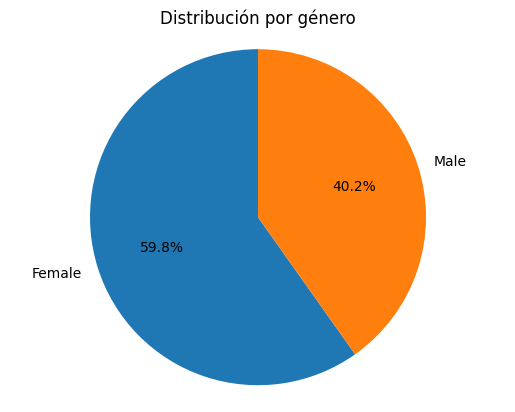

In [80]:
import matplotlib.pyplot as plt

# Contar los valores de la columna
valores = df['gender'].value_counts()

# Crear el gráfico circular
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por género')
plt.axis('equal')  # Hace que el círculo no se vea ovalado
plt.show()

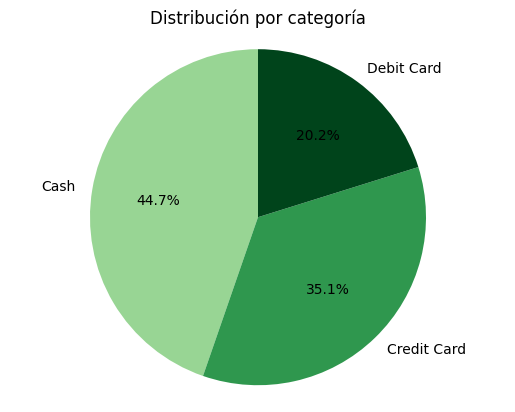

In [81]:
import numpy as np

# Contar los valores de la columna
valores = df['payment_method'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

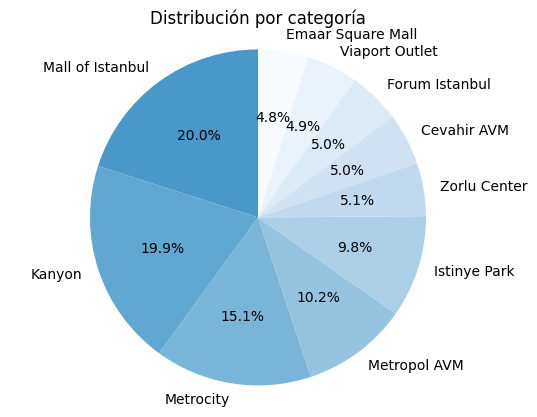

In [83]:
import numpy as np

# Contar los valores de la columna
valores = df['shopping_mall'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Blues_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

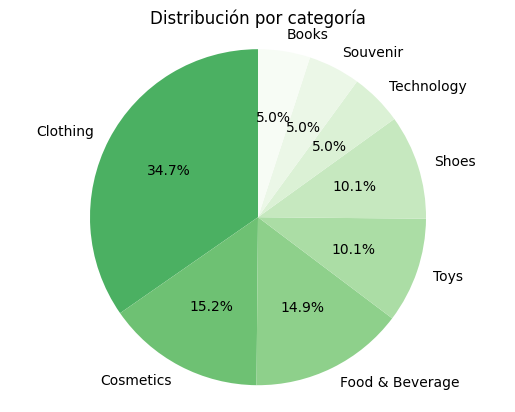

In [96]:
import numpy as np

# Contar los valores de la columna
valores = df['category'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

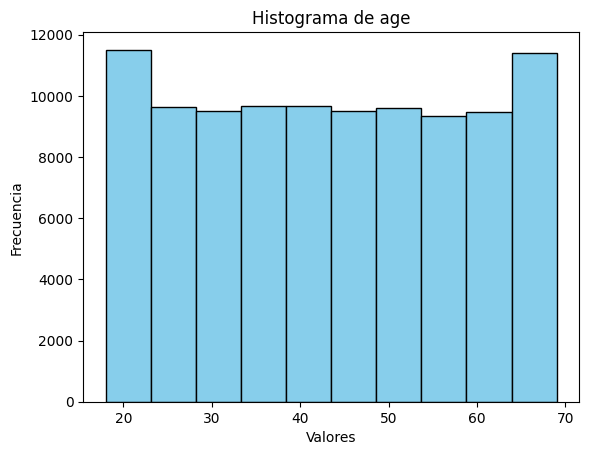

In [98]:
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de age')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

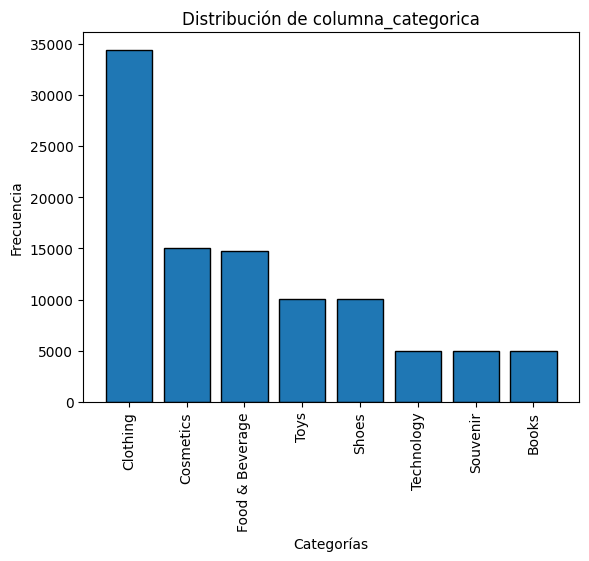

In [105]:
# Contar cuántas veces aparece cada categoría
valores = df['category'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

# Analisis de datos

In [ ]:
#ventas = ventas[ventas.index.isin(clientes.index)] # Filtro por ventas válidas (coherentes con los clientes existentes)

In [ ]:
#set(ventas.index).issubset(set(clientes.index))

True

In [ ]:
#ventas.loc[:,'invoice_date']= pd.to_datetime(ventas['invoice_date'], format='%d-%m-%Y') #estandarizo fechas. Uso loc para asegurar que se modifique toda la columna del df original

In [ ]:
#(clientes['gender'].value_counts(normalize=True)*100).round(2) # aqui vemos cantidad de mujeres y hombres de la muestra en porcentajes


gender
Female    59.81
Male      40.19
Name: proportion, dtype: float64

In [ ]:
#clientes ['age'].describe() # vemos promedio de edades (43.4 años), desviacion estandar (14.98), max (69) y min ( 18 años)

count    99338.000000
mean        43.425859
std         14.989400
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [ ]:
#(clientes ['payment_method'].value_counts(normalize=True)*100).round(2) #aqui vemos metodos de pagos diferenciados en porcentajes

payment_method
Cash           44.69
Credit Card    35.13
Debit Card     20.18
Name: proportion, dtype: float64

In [ ]:
#(clientes.groupby('gender')['payment_method'].value_counts(normalize=True)*100).round(2)

gender  payment_method
Female  Cash              44.57
        Credit Card       35.34
        Debit Card        20.10
Male    Cash              44.88
        Credit Card       34.82
        Debit Card        20.30
Name: proportion, dtype: float64

In [ ]:
#(ventas ['category'].value_counts(normalize=True)*100).round(2)


category
Clothing           34.67
Cosmetics          15.18
Food & Beverage    14.86
Toys               10.14
Shoes              10.08
Technology          5.03
Souvenir            5.02
Books               5.01
Name: proportion, dtype: float64

In [ ]:
#ventas ['price'].describe() # aqui vemos info sobre los precios, prmedio, desviacion standar, max y min

count    99338.000000
mean       689.296890
std        941.368811
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

In [ ]:
#(ventas ['shopping_mall'].value_counts(normalize=True)*100).round(2) # aqui vemos %de participacion de cada mall

shopping_mall
Mall of Istanbul     20.05
Kanyon               19.94
Metrocity            15.10
Metropol AVM         10.21
Istinye Park          9.83
Zorlu Center          5.10
Cevahir AVM           5.02
Forum Istanbul        4.98
Viaport Outlet        4.94
Emaar Square Mall     4.84
Name: proportion, dtype: float64

In [ ]:
#ventas['invoice_date'].min(), ventas['invoice_date'].max() # aca vemos rango de fechas de la muestra

(Timestamp('2021-01-01 00:00:00'), Timestamp('2023-03-08 00:00:00'))

# Merge

En este paso, unimos los dos data frame, utilizando columna customer_id

In [ ]:
#df_final= pd.merge(ventas, clientes, on='customer_id', how='inner')

In [ ]:
#df_final

,invoice_no,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
customer_id,,,,,,,,,
C241288,I138884,Clothing,5,1500.40,2022-08-05 00:00:00,Kanyon,Female,28,Credit Card
C111565,I317333,Shoes,3,1800.51,2021-12-12 00:00:00,Forum Istanbul,Male,21,Debit Card
C266599,I127801,Clothing,1,300.08,2021-11-09 00:00:00,Metrocity,Male,20,Cash
C988172,I173702,Shoes,5,3000.85,2021-05-16 00:00:00,Metropol AVM,Female,66,Credit Card
C189076,I337046,Books,4,60.60,2021-10-24 00:00:00,Kanyon,Female,53,Cash
...,...,...,...,...,...,...,...,...,...
C441542,I219422,Souvenir,5,58.65,2022-09-21 00:00:00,Kanyon,Female,45,Credit Card
C569580,I325143,Food & Beverage,2,10.46,2021-09-22 00:00:00,Forum Istanbul,Male,27,Cash
C103292,I824010,Food & Beverage,2,10.46,2021-03-28 00:00:00,Metrocity,Male,63,Debit Card


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, C241288 to C273973
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99338 non-null  object 
 1   category        99338 non-null  object 
 2   quantity        99338 non-null  int64  
 3   price           99338 non-null  float64
 4   invoice_date    99338 non-null  object 
 5   shopping_mall   99338 non-null  object 
 6   gender          99338 non-null  object 
 7   age             99338 non-null  int64  
 8   payment_method  99338 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [ ]:
 df_final['age'] = df_final['age'].astype(int)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, C241288 to C273973
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99338 non-null  object 
 1   category        99338 non-null  object 
 2   quantity        99338 non-null  int64  
 3   price           99338 non-null  float64
 4   invoice_date    99338 non-null  object 
 5   shopping_mall   99338 non-null  object 
 6   gender          99338 non-null  object 
 7   age             99338 non-null  int64  
 8   payment_method  99338 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


Ahora si, estamos en condiciones de responder preguntas de la consigna


# Respuestas

1 Metodo de pago mas usado:  en est caso, se observa que es el Cash ( efectivo)

In [ ]:
df_final['payment_method'].mode()

0    Cash
Name: payment_method, dtype: object

2 Método de pago por genero: aqui se observa que tanto hombres como mujeres utilizan en similares porcentajes los medios de pago, siendo el mas usado el cash( 44,57% mujeres - 44.88% hombres), luego credito (35.34% mujeres - 34.82% hombres) y finalmente debito ( 20.1% mujeres - 20.3% hombres)

In [ ]:
df_final.groupby('gender')['payment_method'].value_counts()


gender  payment_method
Female  Cash              26479
        Credit Card       20994
        Debit Card        11939
Male    Cash              17918
        Credit Card       13904
        Debit Card         8104
Name: count, dtype: int64

In [ ]:
(df_final.groupby('gender')['payment_method'].value_counts(normalize=True)*100).round(2)

gender  payment_method
Female  Cash              44.57
        Credit Card       35.34
        Debit Card        20.10
Male    Cash              44.88
        Credit Card       34.82
        Debit Card        20.30
Name: proportion, dtype: float64

3 categorización de clientes de acuerdo a su forma de pago (por
edad y género).

In [ ]:
categorizacion= (
    df_final
    .groupby(['age', 'gender', 'payment_method'])  # agrupo los datos edad, genero y metodo de pago
    .size()                                        #cuenta cuantos registros hay en cada grupp
    .reset_index(name='Cantidad')                  #conviete el resultado en un df y lo llma cantidad
    .sort_values(by=['age', 'gender'])              # ordena
)

In [ ]:
categorizacion

,age,gender,payment_method,Cantidad
0,18,Female,Cash,473
1,18,Female,Credit Card,383
2,18,Female,Debit Card,222
3,18,Male,Cash,342
4,18,Male,Credit Card,267
...,...,...,...,...
307,69,Female,Credit Card,394
308,69,Female,Debit Card,217
309,69,Male,Cash,325
310,69,Male,Credit Card,289


4 Métodos de pagos realizados por el rango etario de 25 a 35 años

In [ ]:
df_25_35= df_final[ (df_final['age']>=25)& (df_final['age'] <=35)]
(df_25_35 ['payment_method'].value_counts(normalize=True)*100).round(2)

payment_method
Cash           44.78
Credit Card    34.82
Debit Card     20.40
Name: proportion, dtype: float64

##### 5- Métodos de pago más utilizados por las mujeres. Se observa que el 44.57% utiliza cash

In [ ]:
(df_final[df_final['gender']=='Female']['payment_method'].value_counts(normalize=True)*100).round(2)

payment_method
Cash           44.57
Credit Card    35.34
Debit Card     20.10
Name: proportion, dtype: float64

6- Precios por categoría de productos: aqui vemos el listado de categorias de prodcutos y sus precios promedio

In [ ]:
(df_final.groupby('category')['price'].mean()).round(2)

category
Books                45.56
Clothing            901.12
Cosmetics           122.45
Food & Beverage      15.67
Shoes              1807.28
Souvenir             34.88
Technology         3157.15
Toys                107.75
Name: price, dtype: float64

ETAPA LOAD - datos limpios. Guardamos datos finales para hacer el analisis

In [ ]:
datos_limpios=df_final.copy()   # creo un data frame limpio

In [ ]:
datos_limpios

,invoice_no,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
customer_id,,,,,,,,,
C241288,I138884,Clothing,5,1500.40,2022-08-05 00:00:00,Kanyon,Female,28,Credit Card
C111565,I317333,Shoes,3,1800.51,2021-12-12 00:00:00,Forum Istanbul,Male,21,Debit Card
C266599,I127801,Clothing,1,300.08,2021-11-09 00:00:00,Metrocity,Male,20,Cash
C988172,I173702,Shoes,5,3000.85,2021-05-16 00:00:00,Metropol AVM,Female,66,Credit Card
C189076,I337046,Books,4,60.60,2021-10-24 00:00:00,Kanyon,Female,53,Cash
...,...,...,...,...,...,...,...,...,...
C441542,I219422,Souvenir,5,58.65,2022-09-21 00:00:00,Kanyon,Female,45,Credit Card
C569580,I325143,Food & Beverage,2,10.46,2021-09-22 00:00:00,Forum Istanbul,Male,27,Cash
C103292,I824010,Food & Beverage,2,10.46,2021-03-28 00:00:00,Metrocity,Male,63,Debit Card


Antes de guardarlo como definitivo, hacemos comprobaciones de integridad ( no nulos, no duplicados,tipos de datos)

In [ ]:
datos_limpios[['age', 'payment_method','gender', 'price', 'shopping_mall']].isnull().sum()

age               0
payment_method    0
gender            0
price             0
shopping_mall     0
dtype: int64

In [ ]:
datos_limpios.index.isnull().sum() #acá nos fijamos que customer_id no sea nulo

np.int64(0)

In [ ]:
datos_limpios.duplicated().sum()

np.int64(0)

In [ ]:
set(ventas.index).issubset(set(clientes.index))# aca chequeamos integridad referencial ( mismos registros  en ventas que en clientes)

True

In [ ]:
datos_limpios.info()  #para ver tipos de datos

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, C241288 to C273973
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99338 non-null  object 
 1   category        99338 non-null  object 
 2   quantity        99338 non-null  int64  
 3   price           99338 non-null  float64
 4   invoice_date    99338 non-null  object 
 5   shopping_mall   99338 non-null  object 
 6   gender          99338 non-null  object 
 7   age             99338 non-null  int64  
 8   payment_method  99338 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 9.6+ MB


Una vez verificado la integridad de los datos, se genera archivo datos_limplios.csv

In [ ]:
datos_limpios.to_csv('datos_limpios.csv', index=True)

verificaciones finales:

In [ ]:
df_final=pd.read_csv('datos_limpios.csv')

In [ ]:
df_final

,customer_id,invoice_no,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,C241288,I138884,Clothing,5,1500.40,2022-08-05 00:00:00,Kanyon,Female,28,Credit Card
1,C111565,I317333,Shoes,3,1800.51,2021-12-12 00:00:00,Forum Istanbul,Male,21,Debit Card
2,C266599,I127801,Clothing,1,300.08,2021-11-09 00:00:00,Metrocity,Male,20,Cash
3,C988172,I173702,Shoes,5,3000.85,2021-05-16 00:00:00,Metropol AVM,Female,66,Credit Card
4,C189076,I337046,Books,4,60.60,2021-10-24 00:00:00,Kanyon,Female,53,Cash
...,...,...,...,...,...,...,...,...,...,...
99333,C441542,I219422,Souvenir,5,58.65,2022-09-21 00:00:00,Kanyon,Female,45,Credit Card
99334,C569580,I325143,Food & Beverage,2,10.46,2021-09-22 00:00:00,Forum Istanbul,Male,27,Cash
99335,C103292,I824010,Food & Beverage,2,10.46,2021-03-28 00:00:00,Metrocity,Male,63,Debit Card
99336,C800631,I702964,Technology,4,4200.00,2021-03-16 00:00:00,Istinye Park,Male,56,Cash


In [ ]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99338 entries, 0 to 99337
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99338 non-null  object 
 1   invoice_no      99338 non-null  object 
 2   category        99338 non-null  object 
 3   quantity        99338 non-null  int64  
 4   price           99338 non-null  float64
 5   invoice_date    99338 non-null  object 
 6   shopping_mall   99338 non-null  object 
 7   gender          99338 non-null  object 
 8   age             99338 non-null  int64  
 9   payment_method  99338 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Aca viene la parte de analisis: ver distribucion de edades,ventas segun metodos de pago, ventas segun genero y metodo de pago.  Esto sirve para el informe final y conclusiones
